In [ ]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# 🌍 Clustering National Action Plans (NAPs)
# This notebook analyzes and clusters countries based on the content of their NAPs.

# Step 1: Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

import umap.umap_ as umap

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

print("Libraries loaded.")


Libraries loaded.


In [ ]:
# Step 2: Load cleaned dataset
df = pd.read_csv('final_combined_data.csv')
df.head()

,Country,Year,Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49),There is legislation on sexual harassment in employment (1=yes; 0=no),Women and men have equal ownership rights to immovable property (1=yes; 0=no),"Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)","Mean age at first marriage, female",NAP_Summary,CEDAW,GII_Rank,...,Military_Expenditure,Actors,Timeframe,Objectives,Actions/Activities,Indicators,M&E,Budget,Disarmament,legislation
0,Afghanistan,2018.0,35.0,1.0,1.0,NaN,21.5,Afghanistan adopted its first National Action ...,2003.0,NaN,...,227M,NAP Development\nThe Steering Committee is the...,The NAP spans over two phases of four year per...,The Afghan NAP is organised under the main UNS...,Each Strategic Objective of the Afghan NAP inc...,The annual reporting by the lead agencies will...,The Steering Committee has a central role in t...,The Afghan NAP does not include an allocated o...,Afghanistan's NAP does not address disarmament...,Ministry of Women's Affairs: Institutional mec...
1,Albania,2018.0,6.0,1.0,1.0,61.9,24.2,Albania adopted its first National Action Plan...,1994.0,20.0,...,198M,NAP Development\nThe drafting and developmenta...,The implementation period for the Albanian Nat...,The main objective of the NAP is the implement...,Each area of work has different actions assign...,Each strategic objective has a number of liste...,Reports within the National Action Plan will b...,The Action Plan includes a detailed budget wi...,Albania's NAP does not discuss disarmament iss...,Criminal Code Articles 100 to 108: Laws > Viol...
2,Algeria,2023.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Article 336 of the Penal Code: Laws > Violence...
3,Angola,2018.0,25.0,1.0,1.0,39.2,21.5,Angola adopted its first National Action Plan ...,NaN,NaN,...,NaN,NAP Development\nSpecific civil society organi...,The implementation period of the Angolan NAP i...,The objectives for the Angolan NAP are organis...,Each pillar has different actions assigned. Fo...,"To achieve each objective, the NAP has differe...",For the policies recommended for the period of...,The Angolan NAP includes an allocated budget. ...,The NAP does not address disarmament issues. T...,Campagne nationale contre les violences faites...
4,Antigua and Barbuda,2023.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Section 6 of the Constitution: Laws > Violence...


In [ ]:
# Step 3: Combine key NAP text sections
text_columns = ['Objectives', 'Actions/Activities', 'Indicators', 'M&E', 'Budget', 'Disarmament']
df['Combined_Text'] = df[text_columns].fillna('').agg(' '.join, axis=1)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Combined_Text'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (198, 3000)


In [ ]:
# Step 4: UMAP Dimensionality Reduction
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding = umap_reducer.fit_transform(tfidf_matrix.toarray())

# Add UMAP results to dataframe
df['UMAP_1'] = embedding[:, 0]
df['UMAP_2'] = embedding[:, 1]

## Full embeddings

In [ ]:
# Now import the required libraries
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

In [ ]:
# Load your cleaned NAPs
df = pd.read_csv("final_combined_data.csv")

# Combine policy sections into one text block per country
text_columns = ['Actors', 'Objectives', 'Actions/Activities', 'Indicators', 'M&E', 'Budget', 'Disarmament']
df['combined_text'] = df[text_columns].fillna('').agg(' '.join, axis=1)


In [ ]:
# Load SBERT model
model = SentenceTransformer('all-mpnet-base-v2')  # Or any other sentence-transformers model

# Generate full embeddings
full_embeddings = model.encode(df['combined_text'].tolist(), show_progress_bar=True)

# Save if needed
np.save("full_nap_embeddings.npy", full_embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=4,
    min_samples=2,
    cluster_selection_epsilon=0.1,
    prediction_data=True
)

cluster_labels = clusterer.fit_predict(full_embeddings)
df['Cluster'] = cluster_labels

# Noise info
noise_count = np.sum(cluster_labels == -1)
print(f"Noise points: {noise_count} / {len(cluster_labels)} ({noise_count / len(cluster_labels) * 100:.1f}%)")

Noise points: 0 / 198 (0.0%)


In [ ]:
from sklearn.cluster import KMeans

k = 5  # You can test different values
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(full_embeddings)

df['Cluster_KMeans'] = kmeans_labels

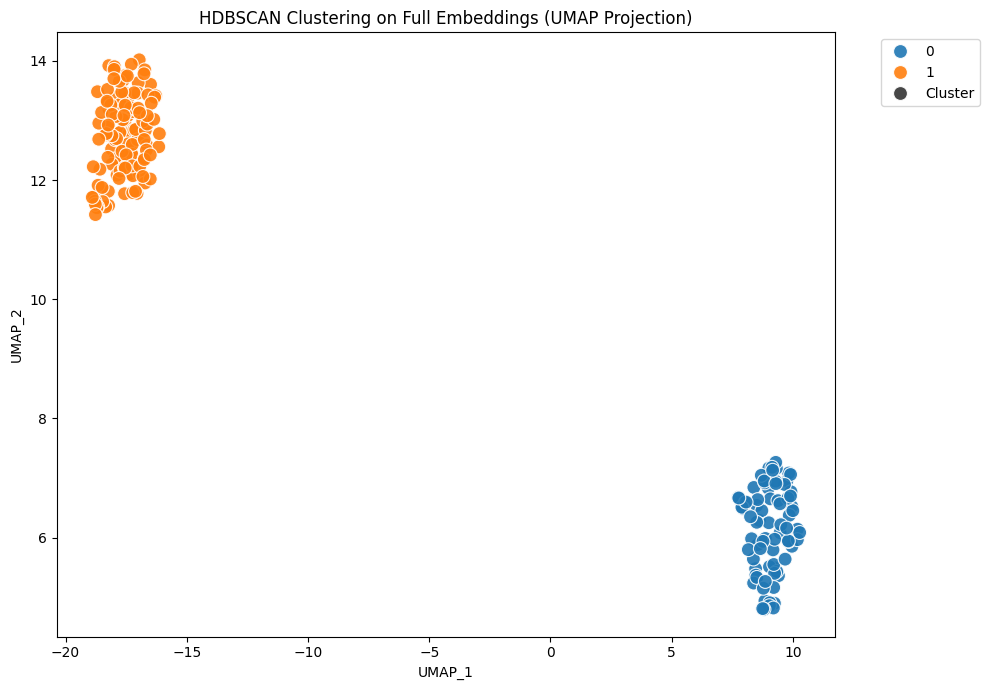

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
umap_2d = umap_model.fit_transform(full_embeddings)

df['UMAP_1'] = umap_2d[:, 0]
df['UMAP_2'] = umap_2d[:, 1]

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue='Cluster',
    palette='tab10',
    data=df,
    style=df['Cluster'].apply(lambda x: 'Noise' if x == -1 else 'Cluster'),
    s=100, alpha=0.9
)
plt.title('HDBSCAN Clustering on Full Embeddings (UMAP Projection)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
for cluster_id in sorted(df['Cluster'].unique()):
    members = df[df['Cluster'] == cluster_id]['Country'].tolist()
    label = "Noise" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"\n{label} ({len(members)} countries):")
    print(", ".join(members))



Cluster 0 (79 countries):
Afghanistan, Albania, Angola, Argentina, Armenia, Australia, Austria, Bangladesh, Belgium, Brazil, Bulgaria, Burkina Faso, Burundi, Cameroon, Canada, Central African Republic, Chad, Chile, Croatia, Denmark, Djibouti, El Salvador, Estonia, Finland, France, Gabon, Georgia, Germany, Ghana, Guatemala, Guinea, Iceland, Indonesia, Iraq, Ireland, Italy, Japan, Jordan, Kazakhstan, Kenya, Kosovo, Latvia, Liberia, Lithuania, Luxembourg, Malawi, Mali, Malta, Moldova, Montenegro, Mozambique, Namibia, Netherlands, New Zealand, Nigeria, North Macedonia, Norway, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Rwanda, Senegal, Serbia, Sierra Leone, Slovenia, Solomon Islands, South Africa, South Sudan, Spain, Sri Lanka, Switzerland, Togo, Uganda, Ukraine, United Kingdom, Uruguay

Cluster 1 (119 countries):
Algeria, Antigua and Barbuda, Azerbaijan, Bahamas, The, Bahrain, Barbados, Belarus, Belize, Benin, Bermuda, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brune

## Clustering

K-means clustering

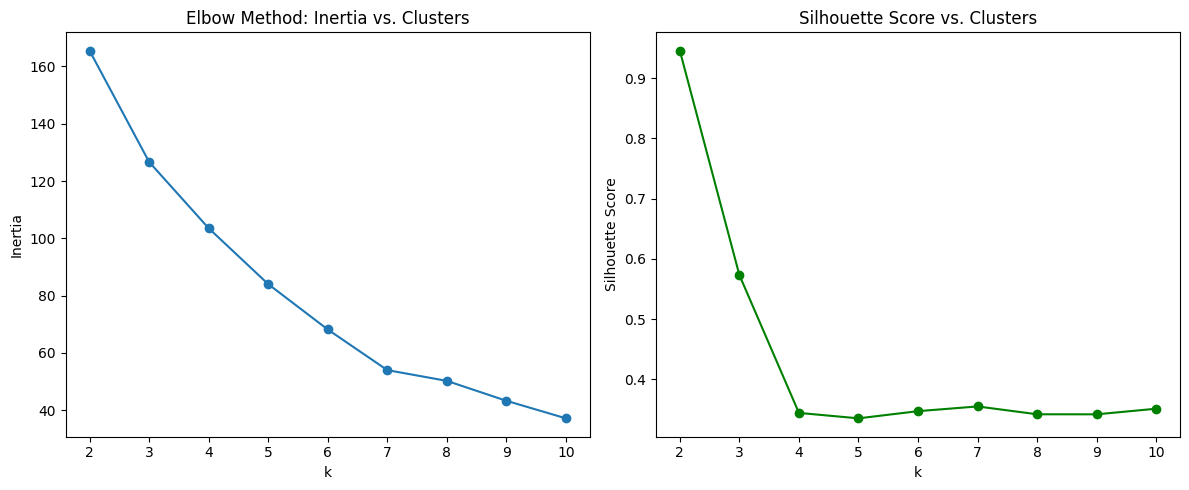

In [ ]:
# Step 5: KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Try multiple values of k
range_n = list(range(2, 11))
inertias = []
sil_scores = []

for k in range_n:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embedding)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(embedding, labels))

# Plot Elbow + Silhouette
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(range_n, inertias, marker='o')
ax[0].set_title('Elbow Method: Inertia vs. Clusters')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')

ax[1].plot(range_n, sil_scores, marker='o', color='green')
ax[1].set_title('Silhouette Score vs. Clusters')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [ ]:
# Step 5: KMeans Clustering
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(embedding)

# Optional: Evaluate clustering
score = silhouette_score(embedding, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.355


Dendogram

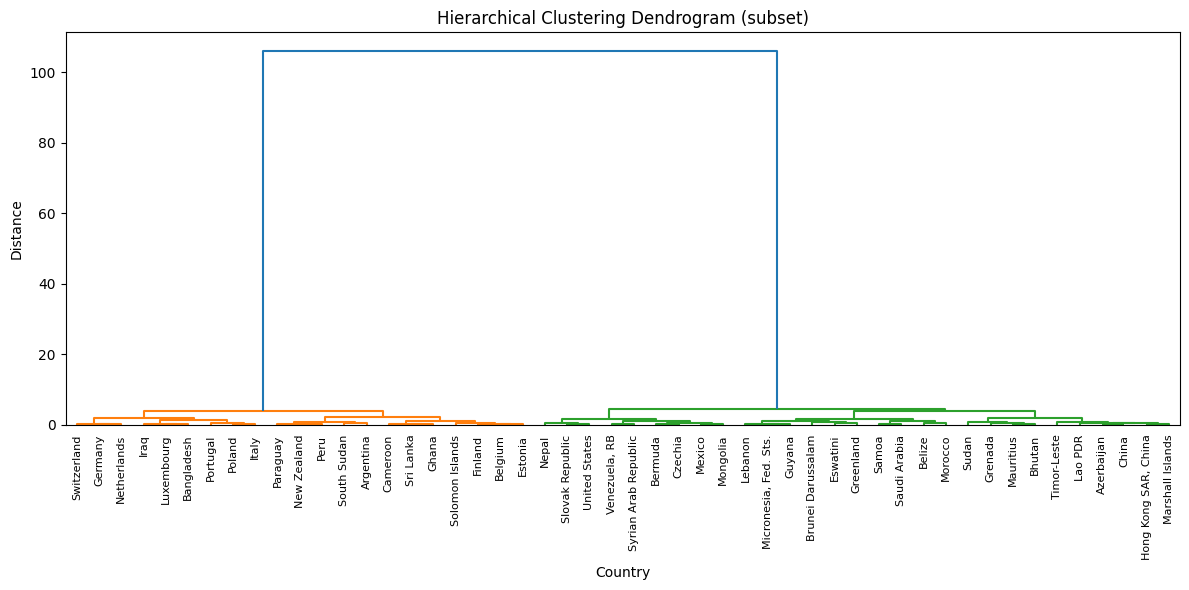

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Use a random subset if the data is too large for legibility
subset = df.sample(min(len(df), 50), random_state=42)
subset_embedding = embedding[subset.index]

# Hierarchical linkage
linked = linkage(subset_embedding, method='ward')

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=subset['Country'].values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (subset)")
plt.xlabel("Country")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


Keyword Heatmap

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['Cluster'] = df['Cluster'].values

cluster_keywords = tfidf_df.groupby('Cluster').mean()

top_n = 10
for cluster_id in cluster_keywords.index:
    print(f"\nTop {top_n} terms for Cluster {cluster_id}:")
    top_terms = cluster_keywords.loc[cluster_id].sort_values(ascending=False).head(top_n)
    print(top_terms)


Top 10 terms for Cluster 0:
zones    0.0
00       0.0
000      0.0
01       0.0
093      0.0
10       0.0
100      0.0
1000     0.0
103      0.0
105      0.0
Name: 0, dtype: float64

Top 10 terms for Cluster 1:
women             0.255954
nap               0.146009
gender            0.107983
conflict          0.097316
ss                0.097250
girls             0.090741
violence          0.076990
implementation    0.071169
security          0.067528
peace             0.061558
Name: 1, dtype: float64

Top 10 terms for Cluster 2:
zones    0.0
00       0.0
000      0.0
01       0.0
093      0.0
10       0.0
100      0.0
1000     0.0
103      0.0
105      0.0
Name: 2, dtype: float64

Top 10 terms for Cluster 3:
women             0.215961
gender            0.124221
nap               0.122695
security          0.115683
peace             0.103705
participation     0.085979
national          0.082086
implementation    0.080738
ss                0.077104
international     0.070463
Name: 3, dty

Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
# Apply Agglomerative Clustering on UMAP-reduced data
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(embedding)

# Add to DataFrame
df['Agglo_Cluster'] = agglo_labels

# Score
agglo_score = silhouette_score(embedding, agglo_labels)
print(f"Agglomerative Clustering Silhouette Score: {agglo_score:.3f}")

Agglomerative Clustering Silhouette Score: 0.326


HDBSCAN

In [ ]:
import hdbscan

In [ ]:
# Apply HDBSCAN on UMAP-reduced data
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=2,
    cluster_selection_epsilon=0.1,
    prediction_data=True
)
hdb_labels = clusterer.fit_predict(embedding)

df['HDBSCAN_Cluster'] = hdb_labels

# HDBSCAN can assign -1 to noise points (i.e., unclustered)
valid_points = hdb_labels != -1
if valid_points.sum() > 1:
    hdb_score = silhouette_score(embedding[valid_points], hdb_labels[valid_points])
    print(f"HDBSCAN Silhouette Score (excluding noise): {hdb_score:.3f}")
else:
    print("Too few clustered points to calculate silhouette score.")

HDBSCAN Silhouette Score (excluding noise): 0.945


Noise points: 0 / 198 (0.0%)


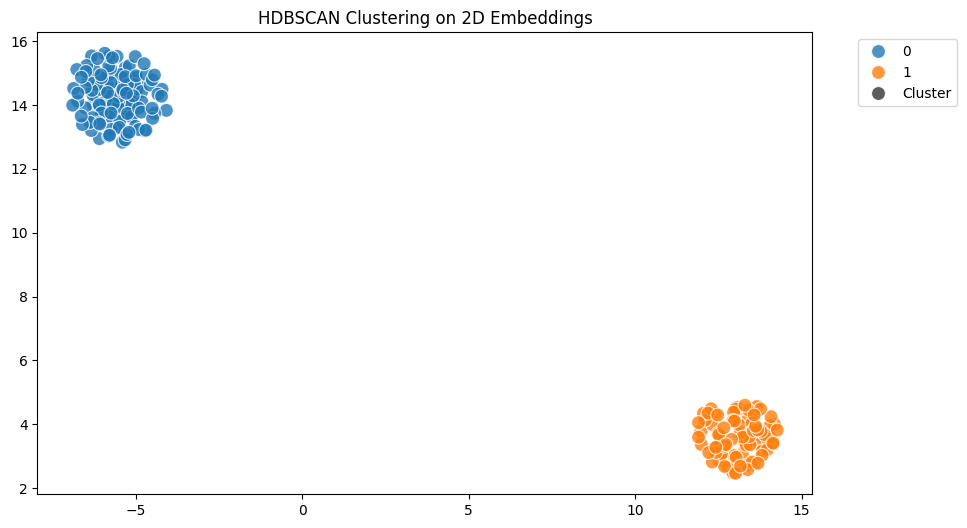

In [ ]:
# Analyze noise
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Count noise points
noise_count = np.sum(hdb_labels == -1)
print(f"Noise points: {noise_count} / {len(hdb_labels)} ({noise_count / len(hdb_labels) * 100:.1f}%)")

# Visualize clusters + noise
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=hdb_labels,
    palette='tab10',
    style=['Noise' if c == -1 else 'Cluster' for c in hdb_labels],
    s=100,
    alpha=0.8
)
plt.title('HDBSCAN Clustering on 2D Embeddings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

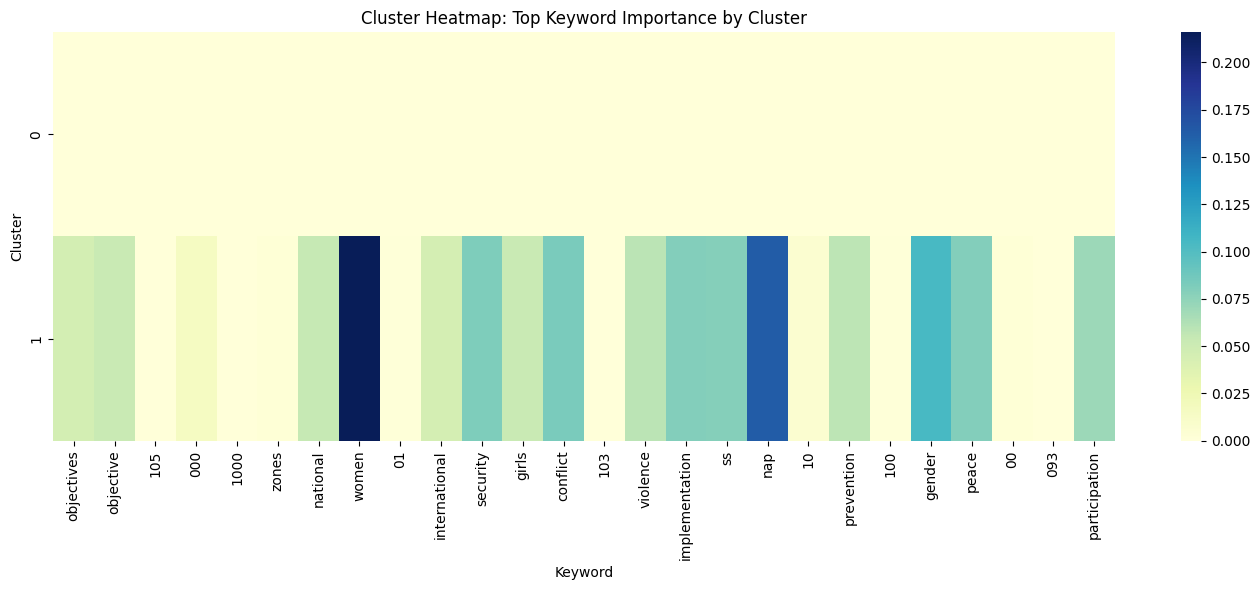

In [ ]:
import seaborn as sns

# Reuse previous TF-IDF clustering summary
top_keywords = set()
for cluster_id in cluster_keywords.index:
    top = cluster_keywords.loc[cluster_id].sort_values(ascending=False).head(10)
    top_keywords.update(top.index)

# Create sub-DF of just top keywords
heat_df = tfidf_df[[*top_keywords]].copy()
heat_df['Cluster'] = df['HDBSCAN_Cluster']

# Cluster mean keyword usage
heatmap_data = heat_df.groupby('Cluster').mean()

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, xticklabels=True)
plt.title("Cluster Heatmap: Top Keyword Importance by Cluster")
plt.xlabel("Keyword")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [ ]:
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster_id} - Sample Country NAP Excerpts:")
    sample = df[df['Cluster'] == cluster_id].sample(2, random_state=42)
    for _, row in sample.iterrows():
        print(f"\nCountry: {row['Country']}")
        # Convert 'Objectives' to string before slicing to handle potential float values
        print(f"Objectives: {str(row['Objectives'])[:300]}...")
        # Convert 'Actions/Activities' to string before slicing to handle potential float values
        print(f"Actions: {str(row['Actions/Activities'])[:300]}...")


Cluster 0 - Sample Country NAP Excerpts:

Country: St. Vincent and the Grenadines
Objectives: nan...
Actions: nan...

Country: Iran, Islamic Rep.
Objectives: nan...
Actions: nan...

Cluster 1 - Sample Country NAP Excerpts:

Country: Ukraine
Objectives: The 2022-2025 NAP identifies five strategic goals that set the vision for Ukraine'ss WPS implementation strategy. They include: 
Participation of Women in Decision-Making: ensuring the equal participation of women and men in decision-making on conflict prevention, conflict resolution an post-conflic...
Actions: Strategic outcomes have a comprehensive set of tasks assigned. These are outlined starting from page 16 of the NAP. It outlines each strategic goal, lists tasks that correspond to this goal, as well as the actor(s) responsible, the time frame for implementation, and the breakdown of the budget for e...

Country: Georgia
Objectives: The 2022-2024 NAP identifies three impact areas that set the vision for Georgia'ss WPS implementati

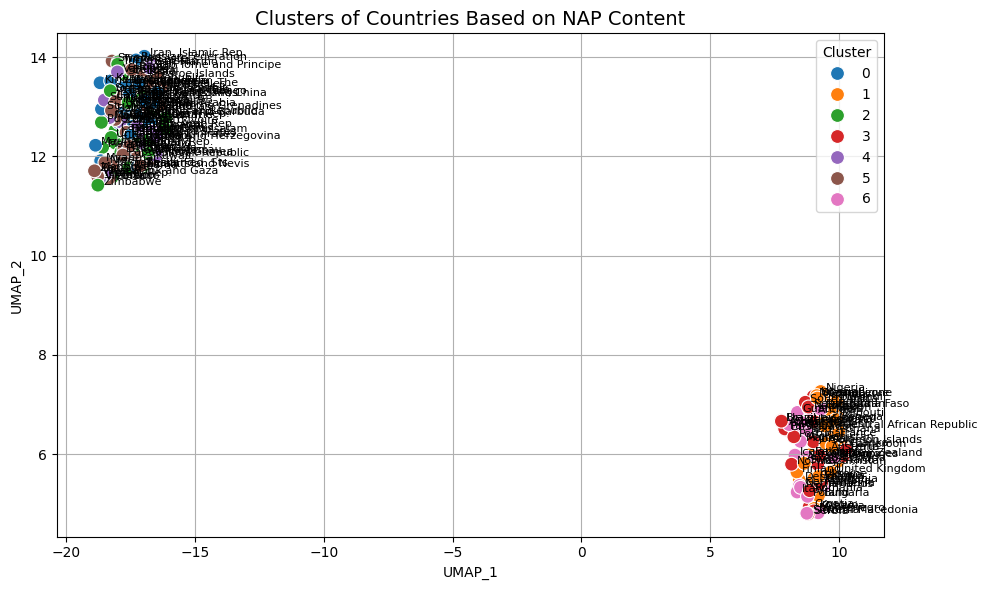

In [ ]:
# Step 6: Visualize K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UMAP_1', y='UMAP_2', hue='Cluster', palette='tab10', s=100)

# Annotate countries
for i in range(df.shape[0]):
    plt.text(df['UMAP_1'][i]+0.2, df['UMAP_2'][i], df['Country'][i], fontsize=8)

plt.title("Clusters of Countries Based on NAP Content", fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

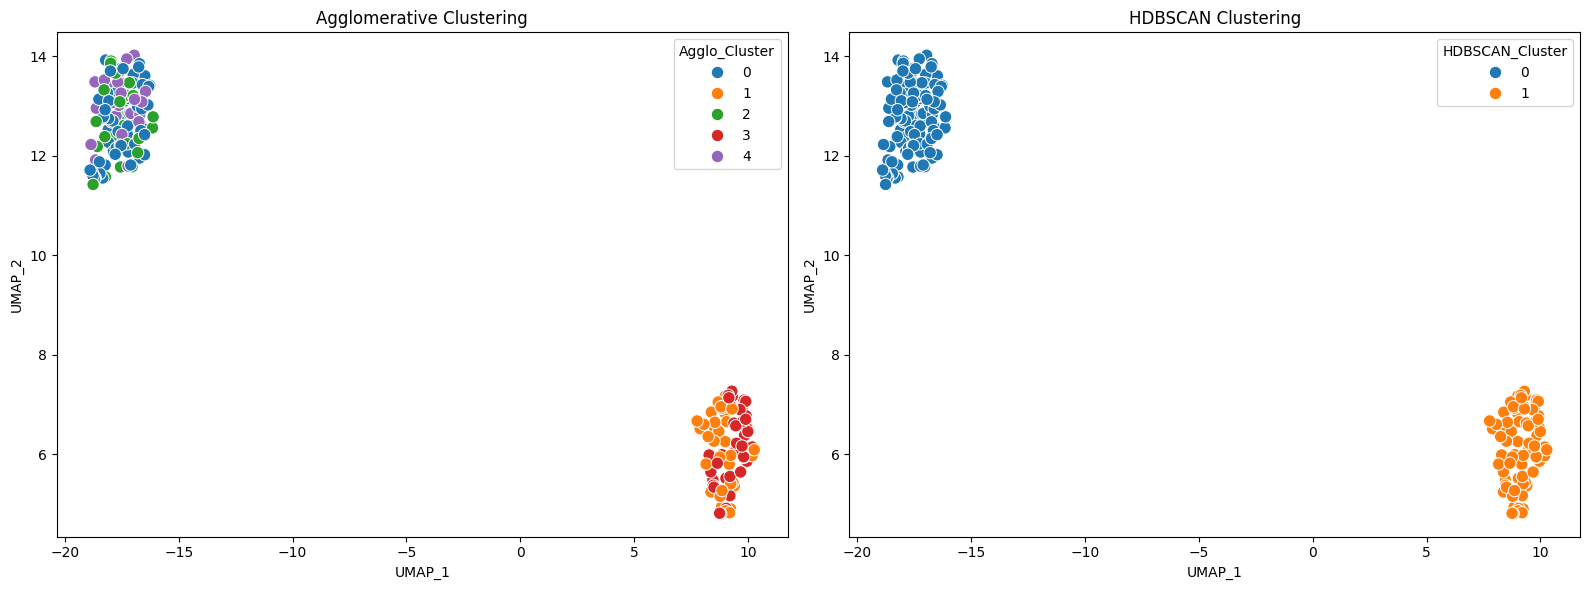

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Agglomerative Clustering
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='Agglo_Cluster', data=df, ax=axs[0], palette='tab10', s=80)
axs[0].set_title("Agglomerative Clustering")

# HDBSCAN
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='HDBSCAN_Cluster', data=df, ax=axs[1], palette='tab10', s=80)
axs[1].set_title("HDBSCAN Clustering")

plt.tight_layout()
plt.show()


In [ ]:
def show_cluster_samples(cluster_col):
    print(f"\n--- Showing cluster samples for {cluster_col} ---")
    for cluster_id in sorted(df[cluster_col].unique()):
        if cluster_id == -1:
            print(f"\nCluster {cluster_id} (Noise/Unclustered):")
        else:
            print(f"\nCluster {cluster_id}:")
        sample = df[df[cluster_col] == cluster_id].sample(min(2, len(df[df[cluster_col] == cluster_id])), random_state=42)
        for _, row in sample.iterrows():
            print(f"Country: {row['Country']}")
            print(f"Objectives: {str(row['Objectives'])[:200]}...")
            print(f"Actions: {str(row['Actions/Activities'])[:200]}...\n")

# Call it like this:
show_cluster_samples('Agglo_Cluster')
show_cluster_samples('HDBSCAN_Cluster')


--- Showing cluster samples for Agglo_Cluster ---

Cluster 0:
Country: Algeria
Objectives: nan...
Actions: nan...

Country: Botswana
Objectives: nan...
Actions: nan...


Cluster 1:
Country: Lithuania
Objectives: The NAP is organized into four overarching goals (called tasks) (p. 8)
 Promote women leadership in international peace processes: this task addresses the inclusion of women in peace operations and mi...
Actions: The NAP breaks each of the four overarching tasks into specific actions, called measures, along with the period of implementation in years (p. 3-9).
 For example, task 2 of ‘To promote gender equality...

Country: Jordan
Objectives: By 2021, the commitments of Jordan to Women, Peace and Security will be based on the following objectives:
Gender responsive security sector reform;
Preventing violent extremism and gender responsive ...
Actions: Each pillar has different actions assigned. For example, Pillar 1 "gender responsiveness and and meaningful participation of wom

In [ ]:
# Step 7: Explore cluster compositions
for cluster_id in range(n_clusters):
    print(f"\\nCluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id]['Country'].tolist())

\nCluster 0:
['Belize', 'Bhutan', 'Bosnia and Herzegovina', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Eritrea', 'Fiji', 'Greenland', 'Grenada', 'Haiti', 'Iran, Islamic Rep.', 'Kiribati', 'Kyrgyz Republic', 'Libya', 'Madagascar', 'Maldives', 'Mauritius', 'Myanmar', 'Nicaragua', 'Russian Federation', 'Singapore', 'Somalia', 'St. Vincent and the Grenadines', 'Sudan', 'Trinidad and Tobago', 'Tunisia']
\nCluster 1:
['Australia', 'Belgium', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Denmark', 'Djibouti', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Ghana', 'Guinea', 'Japan', 'Kenya', 'Kosovo', 'Liberia', 'Malawi', 'Mali', 'Nigeria', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sri Lanka', 'Switzerland', 'Uganda', 'Ukraine', 'United Kingdom']
\nCluster 2:
['Azerbaijan', 'Bahamas, The', 'Barbados', 'Belarus', 'Bermuda', 'Bolivia', 'Cabo Verde', 'Cambodia', 'Congo, Rep.', 'Ecu

## Geopolitical Analysis

## Setup

In [ ]:
country_to_subregion = {
    'Afghanistan': 'Southern Asia',
    'Albania': 'Southern Europe',
    'Angola': 'Middle Africa',
    'Argentina': 'South America',
    'Armenia': 'Western Asia',
    'Australia': 'Australia and New Zealand',
    'Austria': 'Western Europe',
    'Azerbaijan': 'Western Asia',
    'Bangladesh': 'Southern Asia',
    'Belgium': 'Western Europe',
    'Bosnia And Herzegovina': 'Southern Europe',
    'Brazil': 'South America',
    'Bulgaria': 'Eastern Europe',
    'Burkina Faso': 'Western Africa',
    'Burundi': 'Eastern Africa',
    'Cameroon': 'Middle Africa',
    'Canada': 'Northern America',
    'Central African Republic': 'Middle Africa',
    'Chad': 'Middle Africa',
    'Chile': 'South America',
    'Cote Divoire': 'Western Africa',
    'Croatia': 'Southern Europe',
    'Cyprus Nap': 'Western Asia',
    'Czech Republic': 'Eastern Europe',
    'Democratic Republic Of The Congo Drc': 'Middle Africa',
    'Denmark': 'Northern Europe',
    'Djibouti': 'Eastern Africa',
    'El Salvador': 'Central America',
    'Estonia': 'Northern Europe',
    'Finland': 'Northern Europe',
    'France': 'Western Europe',
    'Gabon': 'Middle Africa',
    'Gambia': 'Western Africa',
    'Georgia': 'Western Asia',
    'Germany': 'Western Europe',
    'Ghana': 'Western Africa',
    'Guatemala': 'Central America',
    'Guinea': 'Western Africa',
    'Guinea Bissau': 'Western Africa',
    'Iceland': 'Northern Europe',
    'Indonesia': 'South-Eastern Asia',
    'Iraq': 'Western Asia',
    'Ireland': 'Northern Europe',
    'Italy': 'Southern Europe',
    'Japan': 'Eastern Asia',
    'Jordan': 'Western Asia',
    'Kazakhstan': 'Central Asia',
    'Kenya': 'Eastern Africa',
    'Kosovo': 'Southern Europe',
    'Kyrgyzstan': 'Central Asia',
    'Latvia': 'Northern Europe',
    'Lebanon 2': 'Western Asia',
    'Liberia': 'Western Africa',
    'Lithuania': 'Northern Europe',
    'Luxembourg': 'Western Europe',
    'Malawi': 'Eastern Africa',
    'Mali': 'Western Africa',
    'Malta': 'Southern Europe',
    'Mexico Nap': 'Central America',
    'Moldova': 'Eastern Europe',
    'Montenegro': 'Southern Europe',
    'Morocco': 'Northern Africa',
    'Mozambique': 'Eastern Africa',
    'Namibia': 'Southern Africa',
    'Nepal': 'Southern Asia',
    'Netherlands': 'Western Europe',
    'New Zealand': 'Australia and New Zealand',
    'Niger': 'Western Africa',
    'Nigeria': 'Western Africa',
    'North Macedonia': 'Southern Europe',
    'Norway': 'Northern Europe',
    'Palestine': 'Western Asia',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'South-Eastern Asia',
    'Poland': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Republic Of Congo Brazzaville': 'Middle Africa',
    'Romania': 'Eastern Europe',
    'Rwanda': 'Eastern Africa',
    'Senegal': 'Western Africa',
    'Serbia': 'Southern Europe',
    'Sierra Leone': 'Western Africa',
    'Slovakia': 'Eastern Europe',
    'Slovenia': 'Southern Europe',
    'Solomon Islands': 'Melanesia',
    'South Africa': 'Southern Africa',
    'South Korea': 'Eastern Asia',
    'South Sudan': 'Eastern Africa',
    'Spain': 'Southern Europe',
    'Sri Lanka': 'Southern Asia',
    'Sudan Nap': 'Northern Africa',
    'Sweden 2': 'Northern Europe',
    'Switzerland': 'Western Europe',
    'Tajikistan': 'Central Asia',
    'Timor Leste': 'South-Eastern Asia',
    'Togo': 'Western Africa',
    'Tunisia': 'Northern Africa',
    'Uae Nap': 'Western Asia',
    'Uganda': 'Eastern Africa',
    'Ukraine': 'Eastern Europe',
    'United Kingdom': 'Northern Europe',
    'United States Of America': 'Northern America',
    'Uruguay': 'South America',
    'Yemen': 'Western Asia',
}

In [ ]:
# === Global North vs Global South ===
global_north_south = {
    'Australia': 'North', 'Austria': 'North', 'Belgium': 'North', 'Canada': 'North',
    'Cyprus Nap': 'North', 'Czech Republic': 'North', 'Denmark': 'North', 'Estonia': 'North',
    'Finland': 'North', 'France': 'North', 'Germany': 'North', 'Iceland': 'North',
    'Ireland': 'North', 'Italy': 'North', 'Japan': 'North', 'Latvia': 'North',
    'Lithuania': 'North', 'Luxembourg': 'North', 'Netherlands': 'North', 'New Zealand': 'North',
    'Norway': 'North', 'Poland': 'North', 'Portugal': 'North', 'Slovakia': 'North',
    'Slovenia': 'North', 'South Korea': 'North', 'Spain': 'North', 'Sweden 2': 'North',
    'Switzerland': 'North', 'United Kingdom': 'North', 'United States Of America': 'North'
}

# === NATO Member Countries ===
nato_members = {
    'Albania', 'Belgium', 'Bulgaria', 'Canada', 'Croatia', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Italy',
    'Latvia', 'Lithuania', 'Luxembourg', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
    'Sweden 2', 'Turkey', 'United Kingdom', 'United States Of America'
}

# === African Union Members ===
african_union_members = {
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
    'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Cote Divoire',
    'Democratic Republic Of The Congo Drc', 'Djibouti', 'Egypt', 'Equatorial Guinea',
    'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea Bissau',
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
    'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
    'South Africa', 'South Sudan', 'Sudan Nap', 'Tanzania', 'Togo', 'Tunisia',
    'Uganda', 'Zambia', 'Zimbabwe'
}

# === Countries with Conflict History ===
conflict_countries = {
    'Afghanistan', 'Burundi', 'Central African Republic', 'Chad', 'Colombia', 'Democratic Republic Of The Congo Drc',
    'Iraq', 'Lebanon 2', 'Libya', 'Mali', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Palestine', 'Somalia',
    'South Sudan', 'Sudan Nap', 'Syria', 'Ukraine', 'Yemen'
}

# === Apply Geopolitical Labels ===
df['Global_North_South'] = df['Country'].apply(lambda x: global_north_south.get(x, 'South'))
df['Is_NATO'] = df['Country'].apply(lambda x: 1 if x in nato_members else 0)
df['Is_AU'] = df['Country'].apply(lambda x: 1 if x in african_union_members else 0)
df['Conflict_History'] = df['Country'].apply(lambda x: 1 if x in conflict_countries else 0)


## Code

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Choose number of clusters (adjust as needed)
n_clusters = 4
# Remove affinity parameter as it's not needed with ward linkage
agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['HierCluster'] = agg_clust.fit_predict(embedding)

In [ ]:
!pip install pycountry-convert
import pycountry_convert as pc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 22.6 MB/s eta 0:00:00


In [ ]:
def get_region(country_name):
    try:
        # Normalize country names for known edge cases
        overrides = {
            'South Korea': 'Korea, Republic of',
            'North Macedonia': 'Macedonia',
            'Republic Of Congo Brazzaville': 'Congo',
            'Ivory Coast': "Côte d'Ivoire",
        }
        name = overrides.get(country_name, country_name)
        country_code = pc.country_name_to_country_alpha2(name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception:
        return 'Unknown'

df['Continent'] = df['Country'].apply(get_region)

In [ ]:
cluster_type = "HDBSCAN_Cluster"

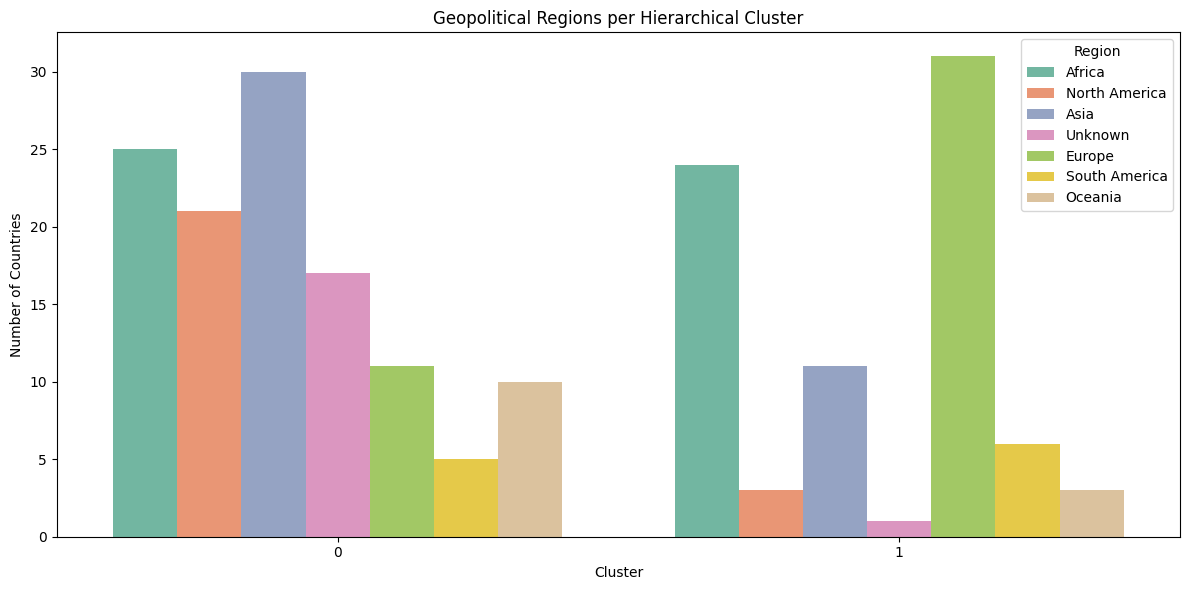

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of regions per cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=cluster_type, hue='Continent', palette='Set2')
plt.title("Geopolitical Regions per Hierarchical Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Countries")
plt.legend(title="Region")
plt.tight_layout()
plt.show()


In [ ]:
# Table of cluster counts by continent
geo_summary = df.groupby([cluster_type, 'Continent']).size().unstack().fillna(0).astype(int)
display(geo_summary)


Continent,Africa,Asia,Europe,North America,Oceania,South America,Unknown
HDBSCAN_Cluster,,,,,,,
0,25,30,11,21,10,5,17
1,24,11,31,3,3,6,1


In [ ]:
df['UN_Subregion'] = df['Country'].map(country_to_subregion)

In [ ]:
cluster_subregion_crosstab = pd.crosstab(df[cluster_type], df['UN_Subregion'])

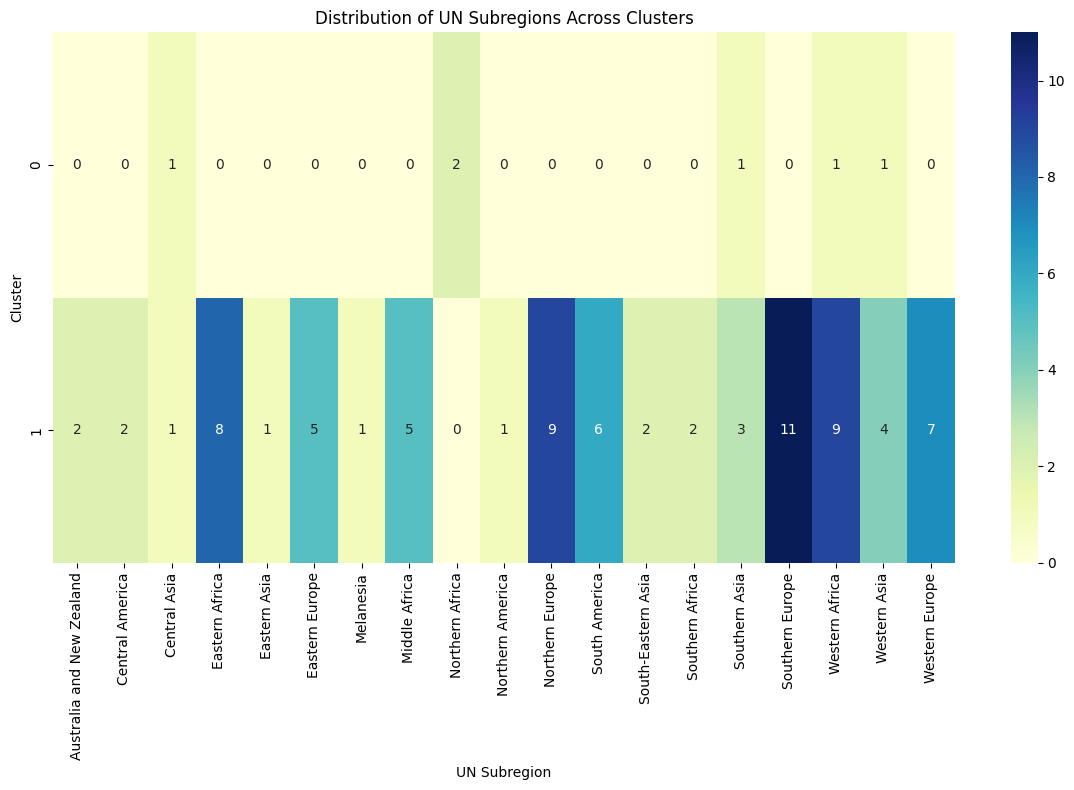

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_subregion_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of UN Subregions Across Clusters')
plt.xlabel('UN Subregion')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

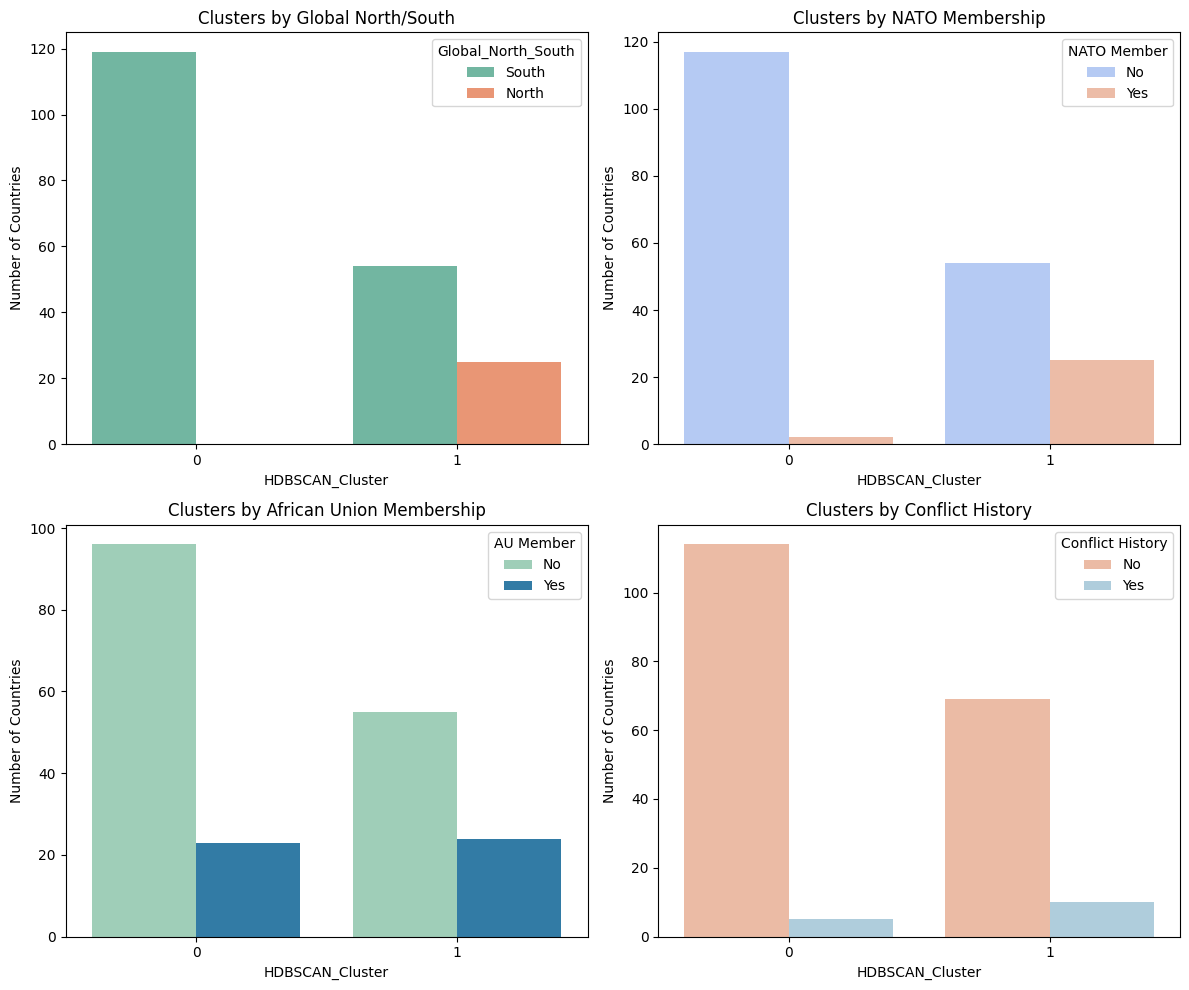

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Cluster' column exists (from your clustering step)
# Adjust cluster_col_name if it's named something else
cluster_col_name = cluster_type

# Get all cluster labels dynamically
cluster_order = sorted(df[cluster_col_name].unique())

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Bar plot: Cluster vs Global North/South
sns.countplot(
    data=df,
    x=cluster_col_name,
    hue='Global_North_South',
    palette='Set2',
    order=cluster_order,  # <- ADD THIS LINE
    ax=axs[0, 0]  # Place in the top-left subplot
)
axs[0, 0].set_title('Clusters by Global North/South')
axs[0, 0].set_ylabel('Number of Countries')

# Bar plot: Cluster vs NATO Membership
sns.countplot(data=df, x=cluster_col_name, hue='Is_NATO', palette='coolwarm', order=cluster_order, ax=axs[0, 1])  # Place in the top-right subplot
axs[0, 1].set_title('Clusters by NATO Membership')
axs[0, 1].set_ylabel('Number of Countries')
axs[0, 1].legend(title='NATO Member', labels=['No', 'Yes'])

# Bar plot: Cluster vs African Union
sns.countplot(data=df, x=cluster_col_name, hue='Is_AU', palette='YlGnBu', order=cluster_order, ax=axs[1, 0])  # Place in the bottom-left subplot
axs[1, 0].set_title('Clusters by African Union Membership')
axs[1, 0].set_ylabel('Number of Countries')
axs[1, 0].legend(title='AU Member', labels=['No', 'Yes'])

# Bar plot: Cluster vs Conflict History
sns.countplot(data=df, x=cluster_col_name, hue='Conflict_History', palette='RdBu', order=cluster_order, ax=axs[1, 1])  # Place in the bottom-right subplot
axs[1, 1].set_title('Clusters by Conflict History')
axs[1, 1].set_ylabel('Number of Countries')
axs[1, 1].legend(title='Conflict History', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

## Concatenated Embeddings

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import hdbscan
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from sklearn.decomposition import NMF
from sklearn.metrics import pairwise_distances
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px

In [ ]:
# Define NAP sections to embed
sections = ['Actors', 'Objectives', 'Actions/Activities', 'Indicators', 'M&E', 'Budget', 'Disarmament']

In [ ]:
# Load embedding model
model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
# Generate concatenated embeddings
all_section_embeddings = []
for _, row in tqdm.tqdm(df.iterrows(), total=len(df)):
    section_embeds = []
    for section in sections:
        text = str(row[section]) if pd.notna(row[section]) else ''
        emb = model.encode(text)
        section_embeds.append(emb)
    full_vector = np.concatenate(section_embeds)
    all_section_embeddings.append(full_vector)

100%|██████████| 198/198 [00:43<00:00,  4.51it/s]


In [ ]:
# Final stacked embeddings
stacked_embeddings = np.vstack(all_section_embeddings)

In [ ]:
# UMAP for visualization
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.05, metric='cosine', random_state=42)
umap_coords = umap_model.fit_transform(stacked_embeddings)
df['UMAP1'] = umap_coords[:, 0]
df['UMAP2'] = umap_coords[:, 1]

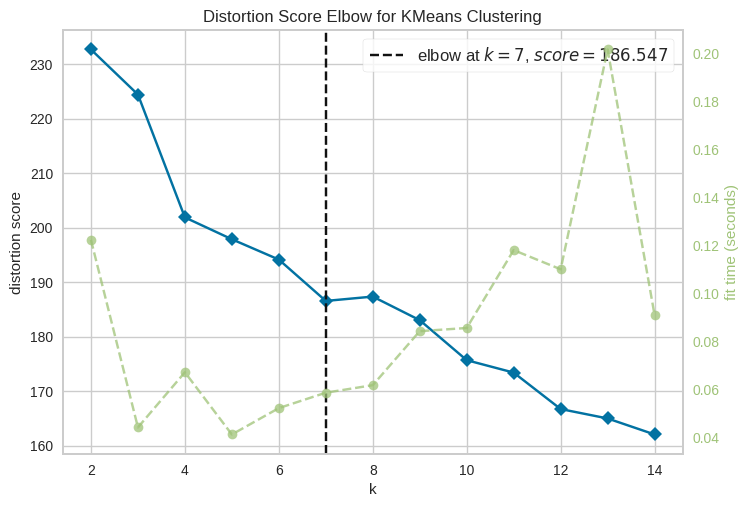

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# ----------------------------
# Cluster Count Evaluation (KMeans)
# ----------------------------
kmeans_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans_model, k=(2, 15))
visualizer.fit(stacked_embeddings)
visualizer.show()

In [ ]:
# Use best value from visualizer
tuned_k = visualizer.elbow_value_
tuned_k

np.int64(7)

In [ ]:
# HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, cluster_selection_method='eom')
df['Cluster_HDBSCAN'] = hdb.fit_predict(stacked_embeddings)

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=tuned_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(stacked_embeddings)
kmeans_score = silhouette_score(stacked_embeddings, df['Cluster_KMeans'])

In [ ]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=tuned_k)
df['Cluster_Agglo'] = agglo.fit_predict(stacked_embeddings)
agglo_score = silhouette_score(stacked_embeddings, df['Cluster_Agglo'])

In [ ]:
print(f"Silhouette Score - KMeans: {kmeans_score:.3f}")
print(f"Silhouette Score - Agglomerative: {agglo_score:.3f}")

Silhouette Score - KMeans: 0.616
Silhouette Score - Agglomerative: 0.625


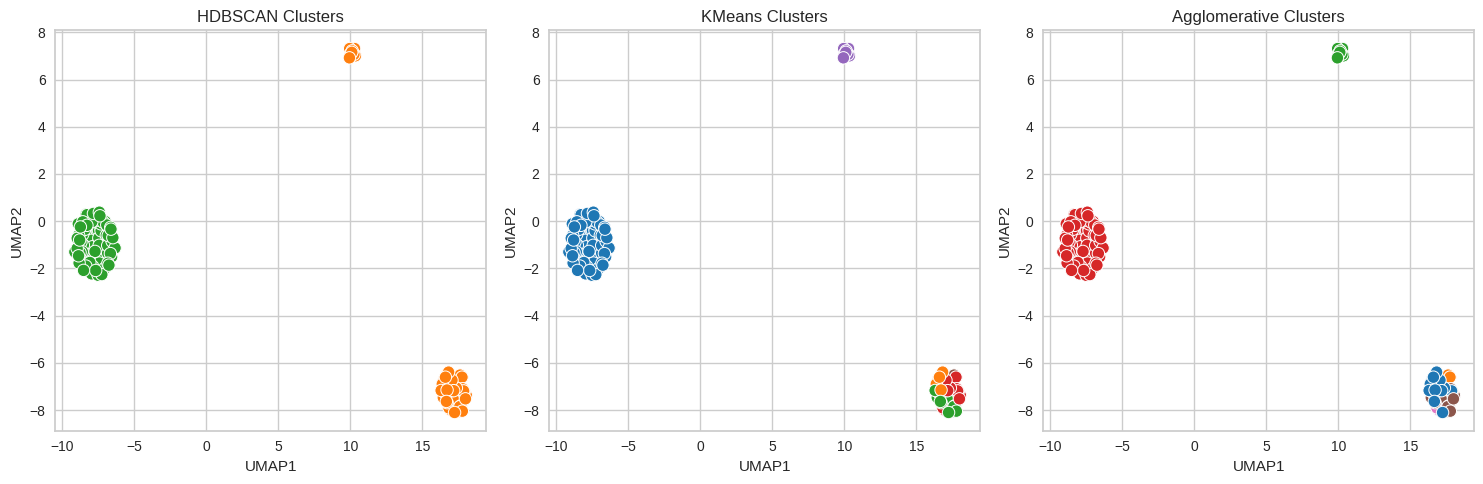

In [ ]:
# ----------------------------
# Visualization
# ----------------------------

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='Cluster_HDBSCAN', palette='tab10', s=80)
plt.title("HDBSCAN Clusters")
plt.legend().remove()

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='Cluster_KMeans', palette='tab10', s=80)
plt.title("KMeans Clusters")
plt.legend().remove()

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='Cluster_Agglo', palette='tab10', s=80)
plt.title("Agglomerative Clusters")
plt.legend().remove()

plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------
# Keyword Extraction per Cluster (TF-IDF)
# ----------------------------

def extract_keywords(corpus, n=10):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

    # Check if corpus contains any data after stop word removal:
    corpus = [text for text in corpus if text.strip() != '']  # remove empty strings in corpus list
    if not any(corpus):  # if all strings are empty
        return [] #return empty list if corpus contains no data

    X = vectorizer.fit_transform(corpus)
    indices = np.argsort(vectorizer.idf_)[::]
    features = vectorizer.get_feature_names_out()
    return [features[i] for i in indices[:n]]

In [ ]:
for cluster_id in sorted(df['Cluster_KMeans'].unique()):
    cluster_text = df[df['Cluster_KMeans'] == cluster_id][sections].fillna('').agg(' '.join, axis=1)
    keywords = extract_keywords(cluster_text.tolist())
    print(f"\nTop keywords for Cluster {cluster_id}: {keywords}")


Top keywords for Cluster 0: []

Top keywords for Cluster 1: ['women', 'gender', 'implementation', 'evaluation', 'disarmament', 'indicators', 'society', 'security', 'nap', 'monitoring']

Top keywords for Cluster 2: ['gender', 'peace', 'disarmament', 'affairs', 'ss', 'evaluation', 'nap', 'monitoring', 'security', 'women']

Top keywords for Cluster 3: ['women', 'nap', 'indicators', 'gender', 'monitoring', 'ministry', 'national', 'ss', 'implementation', 'evaluation']

Top keywords for Cluster 4: ['women', 'implementation', 'nap', 'indicators', 'monitoring', 'participation', 'society', 'evaluation', 'national', 'peace']

Top keywords for Cluster 5: ['violence', 'women', 'society', 'ss', 'security', 'ensure', 'government', 'girls', 'including', 'mechanisms']

Top keywords for Cluster 6: ['2018', 'actions', 'activities', 'affairs', 'agencies', 'civil', 'council', 'commission', 'developing', 'high']


In [ ]:
# ----------------------------
# Topic Modeling (NMF)
# ----------------------------

num_topics = 5
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df[sections].fillna('').agg(' '.join, axis=1))
nmf = NMF(n_components=num_topics, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_
feature_names = vectorizer.get_feature_names_out()


In [ ]:
for topic_idx, topic in enumerate(H):
    top_features = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"\nTopic {topic_idx + 1}: {top_features}")


Topic 1: ['women', 'security', 'peace', 'gender', 'participation', 'action', 'national', 'implementation', 'ss', 'plan']

Topic 2: ['nap', 'implementation', 'society', 'civil', 'monitoring', 'objectives', 'does', 'group', 'objective', 'development']

Topic 3: ['ministry', 'nap', 'gender', 'affairs', 'national', 'implementation', 'women', 'foreign', 'agenda', 'peace']

Topic 4: ['nap', 'wps', 'conflict', 'gender', 'women', 'peace', 'arms', 'agenda', 'including', 'implementation']

Topic 5: ['women', 'nap', 'committee', 'national', 'ss', 'girls', 'conflict', 'gender', 'implementation', 'prevention']


In [ ]:
# ----------------------------
# Deep-Dive into Country Case Studies
# ----------------------------

example_countries = ['Canada', 'Afghanistan', 'Morocco']
for country in example_countries:
    print(f"\n--- {country} ---")
    entry = df[df['Country'] == country]
    if entry.empty:
        print("Not found")
    else:
        for sec in sections:
            print(f"{sec}: {str(entry[sec].values)[0][:300]}\n")


--- Canada ---
Actors: [

Objectives: [

Actions/Activities: [

Indicators: [

M&E: [

Budget: [

Disarmament: [


--- Afghanistan ---
Actors: [

Objectives: [

Actions/Activities: [

Indicators: [

M&E: [

Budget: [

Disarmament: [


--- Morocco ---
Actors: [

Objectives: [

Actions/Activities: [

Indicators: [

M&E: [

Budget: [

Disarmament: [



In [ ]:
geo_tags = {
    'EU': ['France', 'Germany', 'Spain', 'Italy', 'Netherlands', 'Sweden', 'Austria', 'Belgium'],
    'SAARC': ['India', 'Pakistan', 'Nepal', 'Sri Lanka', 'Bangladesh', 'Afghanistan', 'Bhutan', 'Maldives'],
    'AU': ['Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Ethiopia', 'Senegal', 'Uganda', 'Tanzania'],
    'ASEAN': ['Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'Singapore', 'Myanmar', 'Cambodia'],
    'CARICOM': ['Jamaica', 'Barbados', 'Trinidad and Tobago', 'Bahamas', 'Guyana'],
    'GCC': ['Saudi Arabia', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Bahrain', 'Oman']
}
geo_tags.update({
    'NATO': ['United States Of America', 'Canada', 'Germany', 'France', 'Italy', 'United Kingdom', 'Turkey', 'Poland', 'Norway'],
    'BRICS': ['Brazil', 'Russia', 'India', 'China', 'South Africa'],
    'G7': ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States Of America'],
    'MENA': ['Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Lebanon', 'Morocco', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates'],
    'Nordic': ['Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']
})

In [ ]:
for group, countries in geo_tags.items():
    group_df = df[df['Country'].isin(countries)]
    if not group_df.empty:
        cluster_distribution = group_df['Cluster_KMeans'].value_counts()
        print(f"\n{group} Cluster Distribution:\n{cluster_distribution}")


EU Cluster Distribution:
Cluster_KMeans
4    3
2    2
1    1
6    1
0    1
Name: count, dtype: int64

SAARC Cluster Distribution:
Cluster_KMeans
0    5
2    3
Name: count, dtype: int64

AU Cluster Distribution:
Cluster_KMeans
1    3
0    2
3    2
4    1
Name: count, dtype: int64

ASEAN Cluster Distribution:
Cluster_KMeans
0    6
3    2
Name: count, dtype: int64

CARICOM Cluster Distribution:
Cluster_KMeans
0    4
Name: count, dtype: int64

GCC Cluster Distribution:
Cluster_KMeans
0    6
Name: count, dtype: int64

NATO Cluster Distribution:
Cluster_KMeans
4    2
2    2
5    1
6    1
1    1
Name: count, dtype: int64

BRICS Cluster Distribution:
Cluster_KMeans
0    2
2    1
1    1
Name: count, dtype: int64

G7 Cluster Distribution:
Cluster_KMeans
4    3
5    1
6    1
1    1
Name: count, dtype: int64

MENA Cluster Distribution:
Cluster_KMeans
0    6
6    1
3    1
Name: count, dtype: int64

Nordic Cluster Distribution:
Cluster_KMeans
2    2
1    1
4    1
0    1
Name: count, dtype: int64


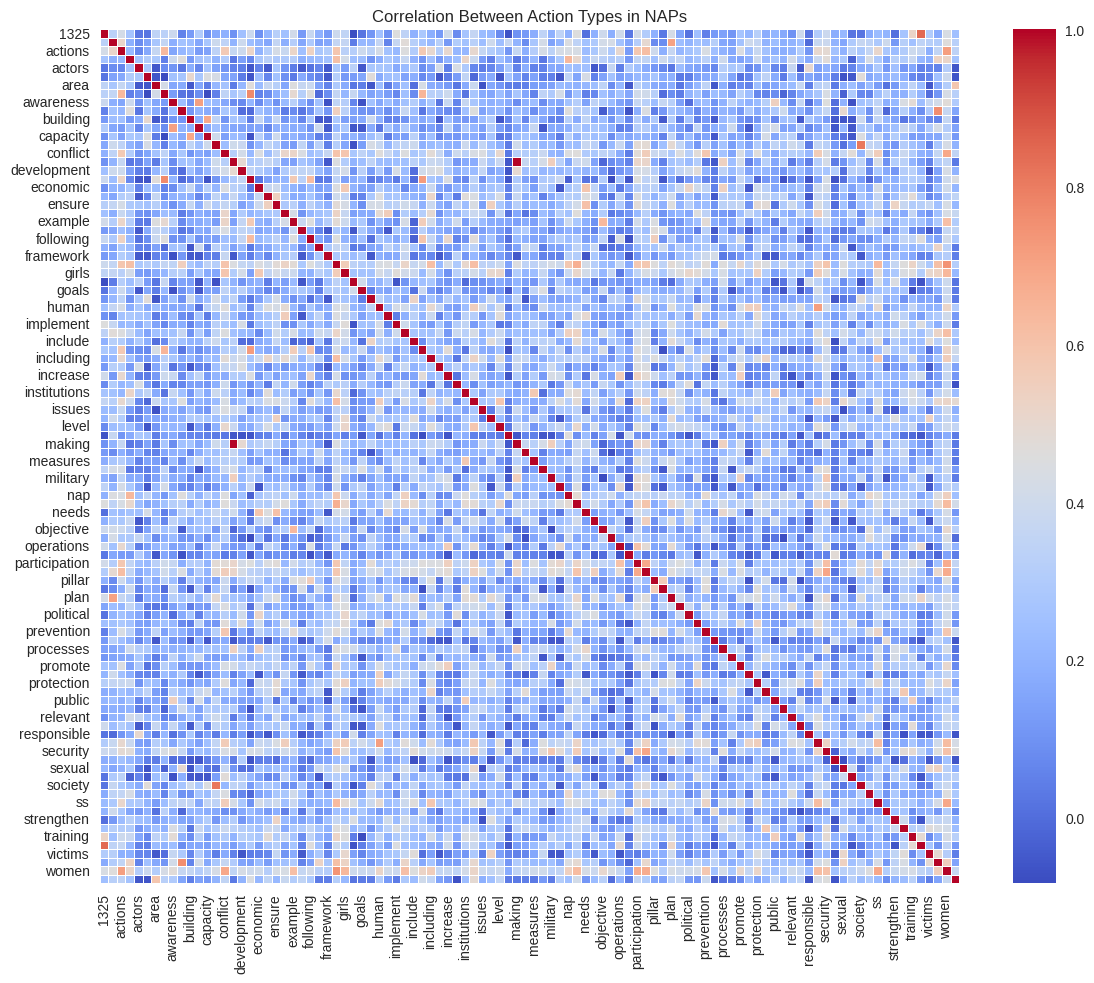

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Extract 'Actions/Activities' column
action_texts = df['Actions/Activities'].fillna('')

# Step 2: Vectorize text into action-type tokens
# Adjust max_features or stop_words as needed
vectorizer = CountVectorizer(
    stop_words='english',
    binary=True,              # Binary presence (1 if action is mentioned)
    max_features=100          # Adjust based on how many common action types you want
)
action_matrix = vectorizer.fit_transform(action_texts)

# Convert to DataFrame for easy analysis
action_df = pd.DataFrame(action_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 3: Compute correlation matrix
correlation_matrix = action_df.corr()

# Step 4: Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Between Action Types in NAPs')
plt.tight_layout()
plt.show()

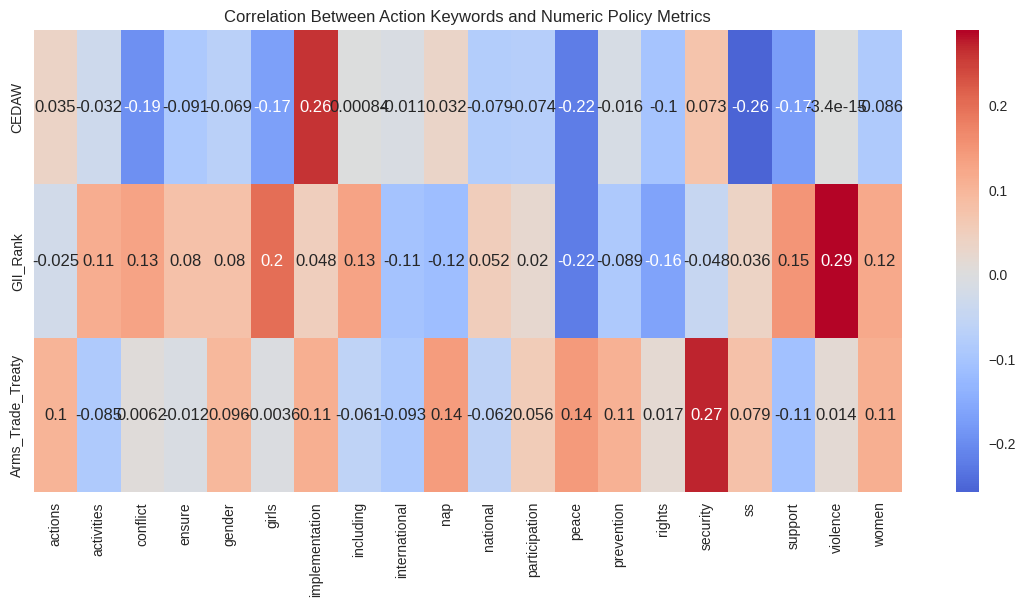

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean data
df_clean = df.copy()
df_clean = df_clean[df_clean['Actions/Activities'].notna()]

# Count vectorize the action text
vectorizer = CountVectorizer(max_features=20, stop_words='english')  # Top 20 keywords
X_action = vectorizer.fit_transform(df_clean['Actions/Activities'])

# Convert to DataFrame
action_keywords_df = pd.DataFrame(X_action.toarray(), columns=vectorizer.get_feature_names_out(), index=df_clean.index)

# Merge with numeric columns
numeric_fields = ['CEDAW', 'GII_Rank', 'Arms_Trade_Treaty']
merged_df = pd.concat([df_clean[numeric_fields].reset_index(drop=True), action_keywords_df.reset_index(drop=True)], axis=1)

# Compute correlations
correlation_matrix = merged_df.corr()

# Show only correlations between numeric fields and action keywords
action_corr = correlation_matrix.loc[numeric_fields, vectorizer.get_feature_names_out()]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(action_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Action Keywords and Numeric Policy Metrics")
plt.show()


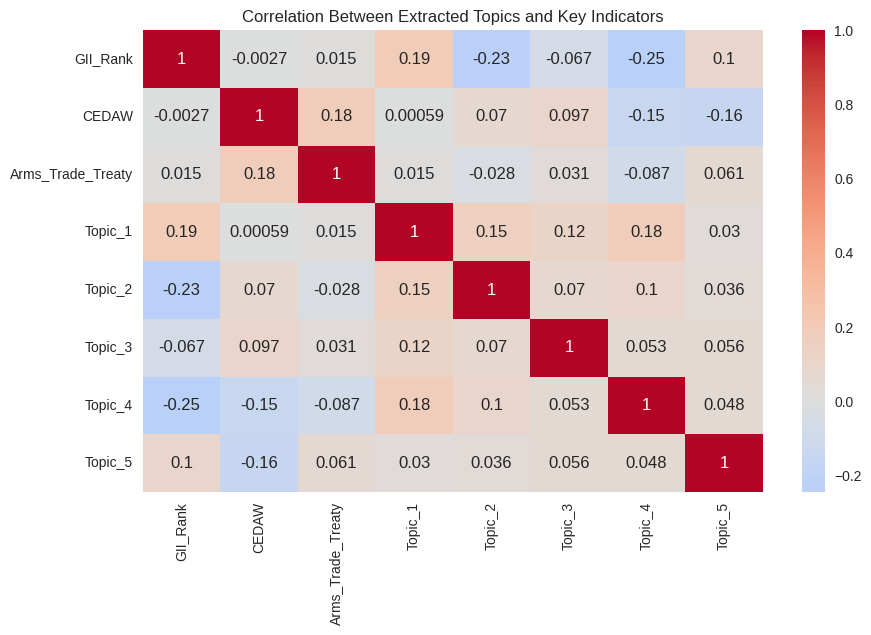

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorize the Objectives and Disarmament texts
texts = df[['Objectives', 'Disarmament']].fillna('').agg(' '.join, axis=1)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)

# Topic Modeling using NMF (easier to interpret than LDA here)
nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(X)  # Topic distribution per country
H = nmf.components_       # Word distribution per topic

# Attach topics back to df
topic_df = pd.DataFrame(W, columns=[f"Topic_{i+1}" for i in range(W.shape[1])])
df_topics = pd.concat([df[['Country', 'GII_Rank', 'CEDAW', 'Arms_Trade_Treaty']], topic_df], axis=1)

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_topics.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Extracted Topics and Key Indicators")
plt.show()


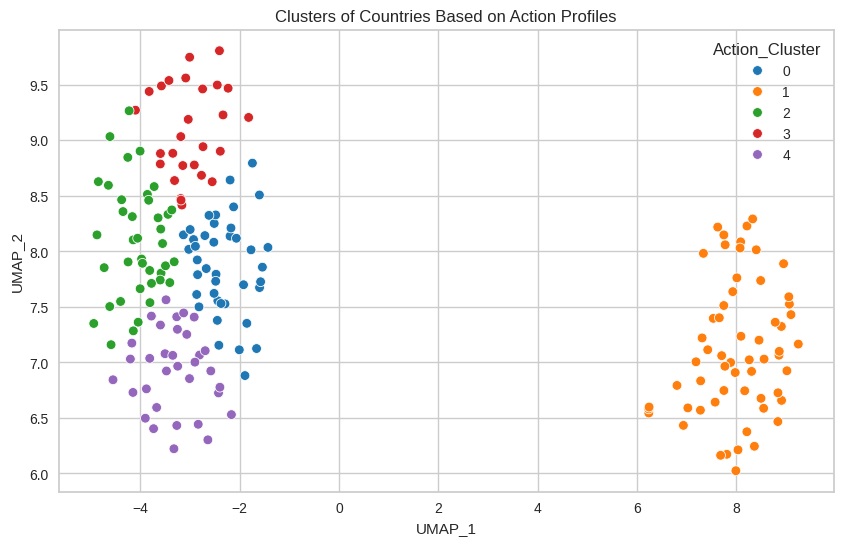

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import umap.umap_ as umap

# TF-IDF
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X = tfidf.fit_transform(df['Actions/Activities'].fillna(''))

# Dimensionality Reduction
reducer = umap.UMAP(n_neighbors=10, min_dist=0.2, metric='cosine', random_state=42)
X_umap = reducer.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Add to DataFrame
df['Action_Cluster'] = clusters
df['UMAP_1'] = X_umap[:, 0]
df['UMAP_2'] = X_umap[:, 1]

# Plot UMAP
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='Action_Cluster', data=df, palette='tab10')
plt.title("Clusters of Countries Based on Action Profiles")
plt.show()


In [ ]:
# Create GII-based groups
high_gii = df[df['GII_Rank'] > df['GII_Rank'].quantile(0.7)]
low_gii = df[df['GII_Rank'] <= df['GII_Rank'].quantile(0.3)]

# Vectorize
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X_high = vectorizer.fit_transform(high_gii['Actions/Activities'].fillna(''))
X_low = vectorizer.transform(low_gii['Actions/Activities'].fillna(''))

# Compare frequencies
high_freq = X_high.sum(axis=0).A1
low_freq = X_low.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()

freq_df = pd.DataFrame({
    'Keyword': vocab,
    'High_GII_Freq': high_freq,
    'Low_GII_Freq': low_freq,
    'Diff': high_freq - low_freq
}).sort_values(by='Diff', ascending=False)

# Show top differing keywords
freq_df.head(10)


,Keyword,High_GII_Freq,Low_GII_Freq,Diff
99,women,71,49,22
13,conduct,19,1,18
97,violence,26,9,17
18,disaster,13,0,13
33,girls,21,8,13
83,sexual,17,4,13
69,provide,14,2,12
14,conflict,27,16,11
25,ensure,19,9,10
4,affected,10,0,10


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['Actions/Activities'].fillna(''))

In [ ]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=10, min_dist=0.2, metric='cosine', random_state=42)
X_umap = reducer.fit_transform(X_tfidf)

In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
clusters = clusterer.fit_predict(X_umap)
df['Cluster'] = clusters

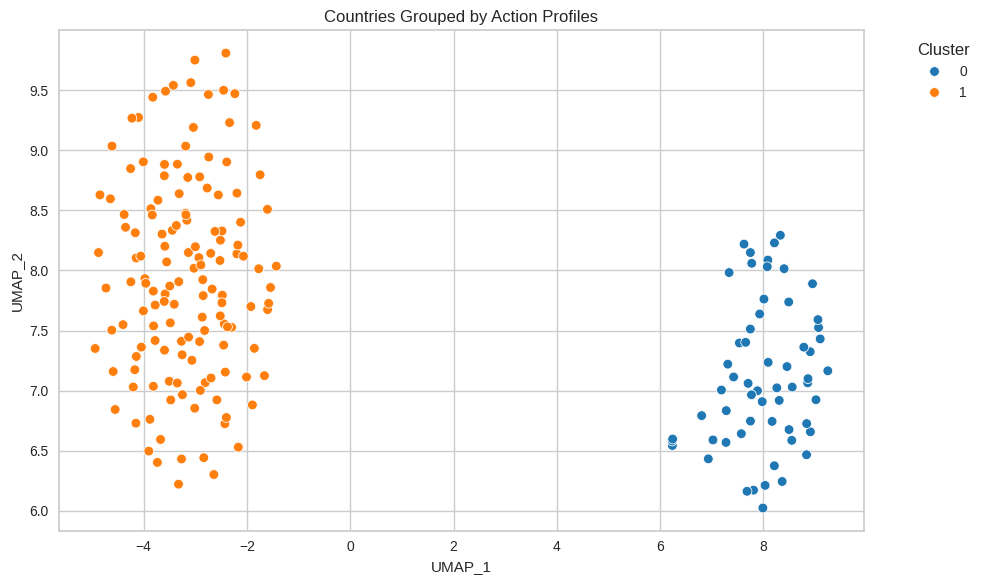

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['UMAP_1'] = X_umap[:, 0]
df['UMAP_2'] = X_umap[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UMAP_1', y='UMAP_2', hue='Cluster', palette='tab10')
plt.title("Countries Grouped by Action Profiles")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

top_keywords_per_cluster = {}
feature_names = tfidf.get_feature_names_out()
for c in sorted(df['Cluster'].unique()):
    idx = df[df['Cluster'] == c].index
    cluster_matrix = X_tfidf[idx].mean(axis=0).A1
    top_indices = np.argsort(cluster_matrix)[::-1][:10]
    top_keywords = [feature_names[i] for i in top_indices]
    top_keywords_per_cluster[c] = top_keywords

# View top words per cluster
for c, keywords in top_keywords_per_cluster.items():
    print(f"Cluster {c}: {', '.join(keywords)}")

Cluster 0: women, gender, conflict, participation, actions, peace, violence, nap, ss, security
Cluster 1: new, mentioned, explicitly, actions, disaster, outcomes, prevention, conflict, specific, zealand


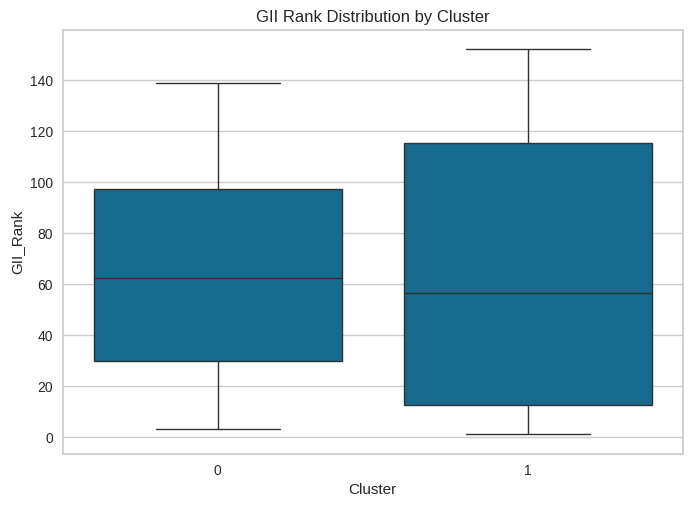

In [ ]:
sns.boxplot(x='Cluster', y='GII_Rank', data=df)
plt.title("GII Rank Distribution by Cluster")
plt.show()

Silhouette Score: 0.326


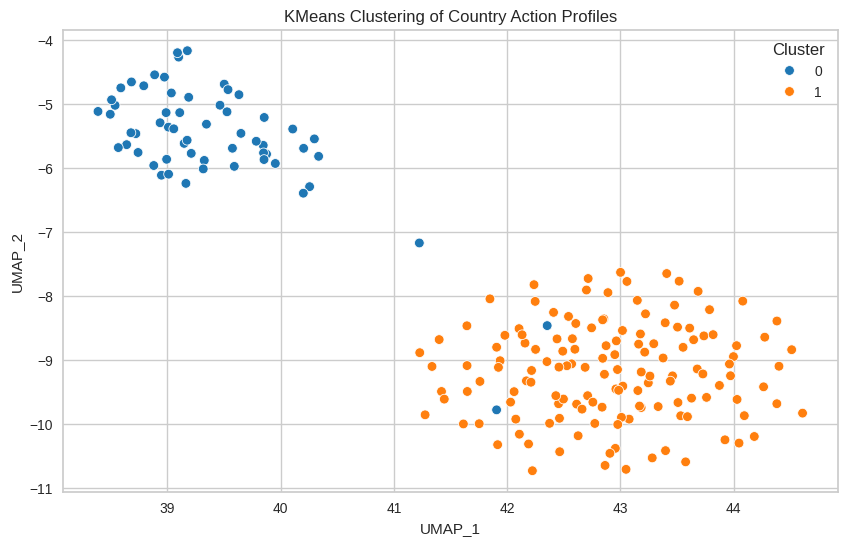


Cluster 0 Summary:
Top Keywords: women, gender, conflict, participation, actions, peace, violence, nap, ss, security
Countries: Afghanistan, Albania, Angola, Argentina, Armenia, Australia, Austria, Bangladesh, Belgium, Brazil, Bulgaria, Burkina Faso, Burundi, Cameroon, Canada, Central African Republic, Chad, Croatia, Denmark, Djibouti, El Salvador, Estonia, Finland, Gabon, Georgia, Guinea, Indonesia, Ireland, Jordan, Kazakhstan, Kenya, Kosovo, Latvia, Liberia, Lithuania, Luxembourg, Malawi, Mali, Malta, Montenegro, Paraguay, Peru, Philippines, Poland, Romania, Senegal, Sierra Leone, Slovenia, Solomon Islands, South Africa, South Sudan, Spain, Sri Lanka, Switzerland, Togo, Uganda, Ukraine, United Kingdom, Uruguay

Cluster 1 Summary:
Top Keywords: new, mentioned, explicitly, actions, disaster, outcomes, prevention, conflict, specific, zealand
Countries: Algeria, Antigua and Barbuda, Azerbaijan, Bahamas, The, Bahrain, Barbados, Belarus, Belize, Benin, Bermuda, Bhutan, Bolivia, Bosnia and

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import umap.umap_ as umap
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load your dataset
df = pd.read_csv("final_combined_data.csv")  # Adjust path if needed

# Step 1: TF-IDF Vectorization of Actions/Activities
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
actions = df['Actions/Activities'].fillna('')
X_tfidf = vectorizer.fit_transform(actions)

# Step 2: UMAP for Dimensionality Reduction
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(X_tfidf)

# Step 5: Agglomerative Clustering
n_clusters = 5  # You can adjust the number of clusters
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') # You can try different linkage methods like 'ward', 'average', 'complete'
df['Cluster'] = agglo.fit_predict(embedding)

# Optional: Evaluate clustering
score = silhouette_score(embedding, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")

# Add to dataframe
df['Cluster'] = clusters
df['UMAP_1'] = X_umap[:, 0]
df['UMAP_2'] = X_umap[:, 1]

# Step 4: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UMAP_1', y='UMAP_2', hue='Cluster', palette='tab10')
plt.title("KMeans Clustering of Country Action Profiles")
plt.show()

# Step 5: Extract Top Keywords per Cluster
feature_names = vectorizer.get_feature_names_out()
top_keywords_per_cluster = {}

for c in sorted(df['Cluster'].unique()):
    indices = df[df['Cluster'] == c].index
    cluster_matrix = X_tfidf[indices].mean(axis=0).A1
    top_indices = np.argsort(cluster_matrix)[::-1][:10]
    top_keywords = [feature_names[i] for i in top_indices]
    top_keywords_per_cluster[c] = top_keywords

# Display summary
for c, keywords in top_keywords_per_cluster.items():
    print(f"\nCluster {c} Summary:")
    print("Top Keywords:", ", ".join(keywords))
    print("Countries:", ", ".join(df[df['Cluster'] == c]['Country'].dropna().unique()))


In [ ]:
import plotly.express as px
import pycountry

# Helper: Convert country names to ISO Alpha-3 codes
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df['ISO3'] = df['Country'].apply(get_country_code)

# Remove rows with missing ISO codes
map_df = df.dropna(subset=['ISO3'])

# Plot using Plotly
fig = px.choropleth(
    map_df,
    locations='ISO3',
    color='Cluster',
    hover_name='Country',
    title='NAP Country Clusters Based on Action Profiles',
    color_continuous_scale='Viridis'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


In [ ]:
import pandas as pd
import re
from collections import Counter
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Extract actor phrases
def extract_actors(text):
    doc = nlp(text)
    actors = []
    for chunk in doc.noun_chunks:
        phrase = chunk.text.strip().lower()
        if any(keyword in phrase for keyword in [
            "ministry", "department", "government", "ngo", "commission", "council",
            "authority", "organization", "agency", "forces", "committee", "office"
        ]):
            actors.append(phrase)
    return actors

actor_phrases = []
for text in actions:
    actor_phrases.extend(extract_actors(text))

# Clean and count actors
def clean_actor_name(name):
    return re.sub(r'\W+', ' ', name).strip().title()

cleaned_actors = [clean_actor_name(a) for a in actor_phrases if len(a.split()) <= 6]
actor_counts = Counter(cleaned_actors).most_common(30)

# Display top actors
print("🔎 Top Institutional Actors Referenced in NAP Actions:\n")
for actor, count in actor_counts:
    print(f"{actor}: {count} mentions")

🔎 Top Institutional Actors Referenced in NAP Actions:

The Ministry: 12 mentions
Departments: 4 mentions
Civil Society Organizations: 3 mentions
Office: 2 mentions
The Government: 2 mentions
The Danish Ministry: 2 mentions
Government Institutions: 2 mentions
The Organizational Lead: 2 mentions
Police Officers: 2 mentions
Prosecution Office: 1 mentions
Women Officers: 1 mentions
Armed Forces Structures: 1 mentions
The Defense And Security Forces: 1 mentions
High Profile Forces: 1 mentions
The Government Actors: 1 mentions
The Council: 1 mentions
The Defense Ministry: 1 mentions
Liaison Officers: 1 mentions
The White Helmet Commission: 1 mentions
Humanitarian Organization: 1 mentions
Organization: 1 mentions
Agency: 1 mentions
Influence Government Agencies: 1 mentions
Junior Officer Professionals: 1 mentions
Key Government Institutions: 1 mentions
Council Human Rights: 1 mentions
All Partner Departments: 1 mentions
Women Ss Rights Organizations: 1 mentions
The Security And Defense Forces

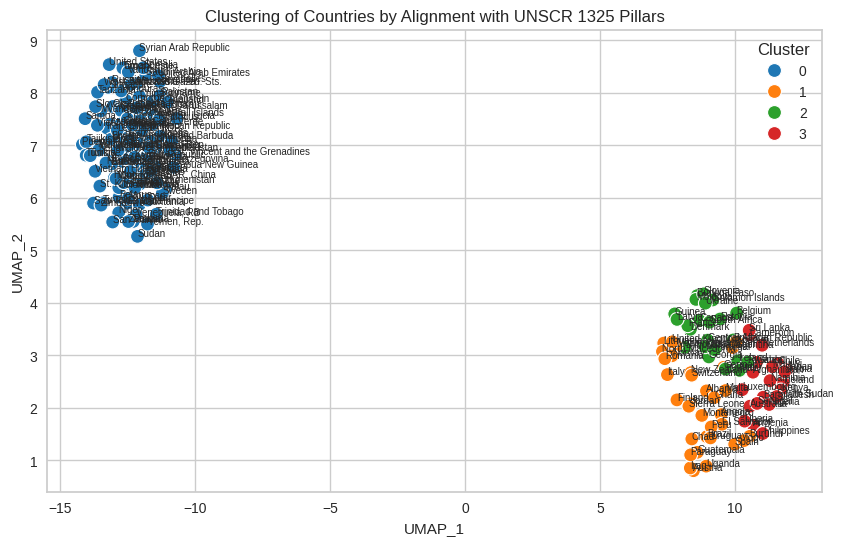


🟣 Cluster 0 Summary (120 countries):
Top Countries: Algeria, Antigua and Barbuda, Azerbaijan, Bahamas, The, Bahrain
Average Pillar Scores:
Participation      0.001
Protection         0.000
Prevention         0.000
Relief_Recovery    0.000
dtype: float64

🟣 Cluster 1 Summary (33 countries):
Top Countries: Albania, Angola, Argentina, Austria, Brazil
Average Pillar Scores:
Participation      0.163
Protection         0.210
Prevention         0.061
Relief_Recovery    0.063
dtype: float64

🟣 Cluster 2 Summary (24 countries):
Top Countries: Belgium, Bulgaria, Burkina Faso, Canada, Central African Republic
Average Pillar Scores:
Participation      0.119
Protection         0.387
Prevention         0.101
Relief_Recovery    0.091
dtype: float64

🟣 Cluster 3 Summary (21 countries):
Top Countries: Afghanistan, Armenia, Australia, Bangladesh, Cameroon
Average Pillar Scores:
Participation      0.183
Protection         0.218
Prevention         0.146
Relief_Recovery    0.320
dtype: float64


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("final_combined_data.csv")
df['Full_Text'] = df['Objectives'].fillna('') + ' ' + df['Actions/Activities'].fillna('') + ' ' + df['Disarmament'].fillna('')

# Define Pillar Lexicons
pillar_keywords = {
    "Participation": ["participation", "representation", "leadership", "decision-making", "inclusive", "empowerment", "election", "dialogue", "consultation", "engagement"],
    "Protection": ["protection", "violence", "gbv", "gender-based", "sexual violence", "harassment", "trafficking", "safe", "security", "rights"],
    "Prevention": ["prevention", "early warning", "radicalization", "root causes", "conflict prevention", "extremism", "risk reduction", "monitoring"],
    "Relief_Recovery": ["relief", "recovery", "reintegration", "resettlement", "rehabilitation", "reconstruction", "services", "aid", "support", "livelihood"]
}

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
tfidf_matrix = tfidf.fit_transform(df['Full_Text'])
tfidf_vocab = tfidf.get_feature_names_out()

# Score each pillar based on keyword TF-IDF sum
def get_pillar_score(row_vector, keywords):
    indices = [i for i, term in enumerate(tfidf_vocab) if term in keywords]
    return row_vector[0, indices].sum() if indices else 0

pillar_scores = []
for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i]
    scores = {pillar: get_pillar_score(row, keywords) for pillar, keywords in pillar_keywords.items()}
    pillar_scores.append(scores)

# Build a dataframe from pillar scores
pillar_df = pd.DataFrame(pillar_scores)
pillar_df['Country'] = df['Country']

# Clustering with UMAP + KMeans
X = pillar_df.drop(columns='Country')
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, metric='euclidean', random_state=42)
X_umap = umap_model.fit_transform(X)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

pillar_df['Cluster'] = clusters
pillar_df['UMAP_1'] = X_umap[:, 0]
pillar_df['UMAP_2'] = X_umap[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pillar_df, x='UMAP_1', y='UMAP_2', hue='Cluster', palette='tab10', s=100)
for i in range(len(pillar_df)):
    plt.text(pillar_df['UMAP_1'][i], pillar_df['UMAP_2'][i], pillar_df['Country'][i], fontsize=7)
plt.title("Clustering of Countries by Alignment with UNSCR 1325 Pillars")
plt.show()

# Display cluster summaries
for c in sorted(pillar_df['Cluster'].unique()):
    cluster_data = pillar_df[pillar_df['Cluster'] == c]
    print(f"\n🟣 Cluster {c} Summary ({len(cluster_data)} countries):")
    print("Top Countries:", ", ".join(cluster_data['Country'].head(5).tolist()))
    print("Average Pillar Scores:")
    print(cluster_data.drop(columns=['Country', 'Cluster', 'UMAP_1', 'UMAP_2']).mean().round(3))


In [ ]:
import pandas as pd
import pycountry
import plotly.express as px

# Assume pillar_df already contains the clustering results and 'Country' column

# Convert to ISO Alpha-3 codes
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

pillar_df['ISO3'] = pillar_df['Country'].apply(get_country_code)
map_df = pillar_df.dropna(subset=['ISO3'])

# Plot
fig = px.choropleth(
    map_df,
    locations='ISO3',
    color='Cluster',
    hover_name='Country',
    title='UNSCR 1325 Pillar-Based Clusters by Country',
    color_continuous_scale='Plasma'
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


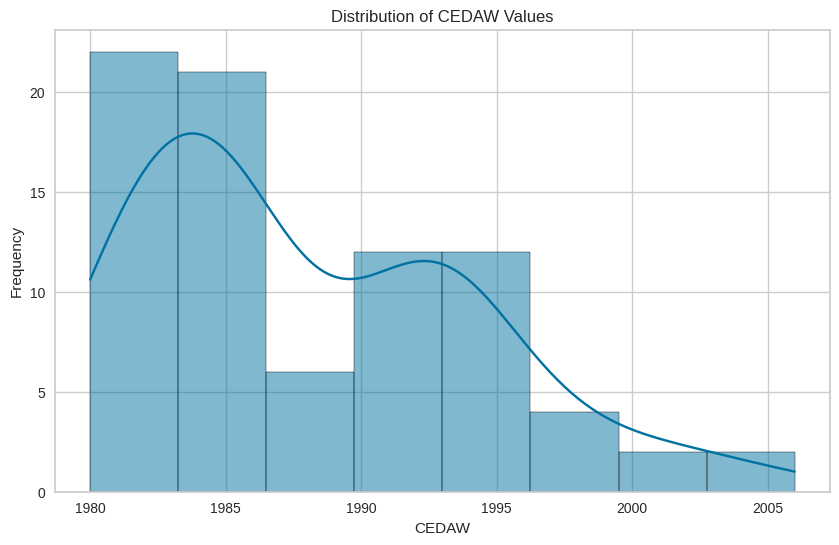

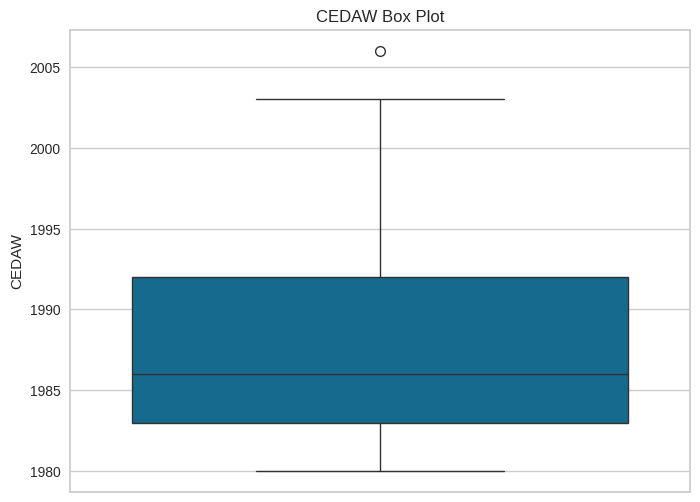

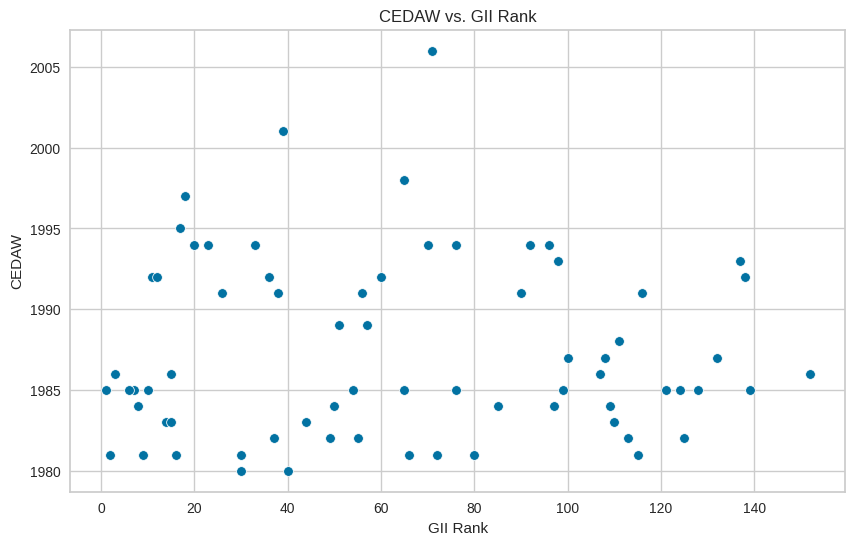

In [ ]:
# prompt: graph by cedaw

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'CEDAW' is a column in it

plt.figure(figsize=(10, 6))
sns.histplot(df['CEDAW'], kde=True)  # You can add kde=False to remove the density curve
plt.title('Distribution of CEDAW Values')
plt.xlabel('CEDAW')
plt.ylabel('Frequency')
plt.show()


# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='CEDAW', data=df)
plt.title('CEDAW Box Plot')
plt.ylabel('CEDAW')
plt.show()

# Scatter plot with another relevant variable (replace 'GII_Rank' with your variable)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GII_Rank', y='CEDAW', data=df)
plt.title('CEDAW vs. GII Rank')
plt.xlabel('GII Rank')
plt.ylabel('CEDAW')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import umap
from sklearn.metrics import silhouette_samples, silhouette_score
import re

# ------------- Load Data -------------
df = pd.read_csv('nap_nlp_enriched.csv')  # must include Embedding, Topic_*, Cluster, UMAP1, UMAP2, Country, Region, Legislation_List

# ------------- Parse Legislation Column -------------
# Expect format: "Law Name 1: Description 1\nLaw Name 2: Description 2"
def parse_legislation(text):
    laws = []
    if pd.isna(text):
        return laws
    for entry in re.split(r"\n|;", text):
        parts = entry.split(":", 1)
        if len(parts) == 2:
            name = parts[0].strip()
            desc = parts[1].strip()
            laws.append({'name': name, 'description': desc})
    return laws

# Apply parser
df['Legislation_Parsed'] = df['Legislation_List'].apply(parse_legislation)
# Number of laws per country
df['Num_Laws'] = df['Legislation_Parsed'].apply(len)

# Extract categories from descriptions using '>' delimiter, if present
def extract_categories(laws):
    cats = []
    for law in laws:
        parts = law['description'].split('>')
        # take all parts as categories
        for cat in parts:
            cat_clean = cat.strip()
            if cat_clean:
                cats.append(cat_clean)
    return cats

# Build category features
df['Legislation_Categories'] = df['Legislation_Parsed'].apply(extract_categories)
# Flatten category list for vectorization
df['Cat_Text'] = df['Legislation_Categories'].apply(lambda cats: ' '.join(cats))

# Vectorize categories with CountVectorizer
cat_vectorizer = CountVectorizer(lowercase=True, token_pattern=r"(?u)\b\w+\b")
cat_dtm = cat_vectorizer.fit_transform(df['Cat_Text'])
cat_feature_names = cat_vectorizer.get_feature_names_out()
# Limit to top 10 frequent categories
cat_counts = np.asarray(cat_dtm.sum(axis=0)).ravel()
top_idx = np.argsort(cat_counts)[-10:]
top_cats = [cat_feature_names[i] for i in top_idx]
# Create binary indicators for top categories
for cat in top_cats:
    df[f'Cat_{cat}'] = (df['Cat_Text'].str.contains(rf"\b{re.escape(cat)}\b", case=False)).astype(int)

# ------------- Integrate New Features into Analysis -------------
# Update feature columns for heatmap and cluster analysis
feature_cols = [
    'GII_Rank', 'Military_Expenditure_Clean',
    'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever partnered women ages 15-49)',
    'Mean age at first marriage, female',
    'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care  (% of women age 15-49)',
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Women and men have equal ownership rights to immovable property (1=yes; 0=no)',
    'CEDAW_Ratified', 'ATT_Ratified', 'Num_Laws'
] + [f'Cat_{cat}' for cat in top_cats]

# ------------- Visualizations -------------
# 1. UMAP Scatter by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=df, palette='tab10', s=60, alpha=0.8)
plt.title('UMAP Projection of NAP Embeddings Colored by Cluster')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 2. World Map with Plotly
merge_df = df[['Country', 'Cluster']].copy()
name_map = {'United States': 'United States', 'Russia': 'Russian Federation', "Côte d'Ivoire": "Cote d'Ivoire"}
merge_df['Country_plot'] = merge_df['Country'].replace(name_map)
fig = px.choropleth(merge_df, locations='Country_plot', locationmode='country names', color='Cluster',
                    color_continuous_scale=px.colors.qualitative.Plotly,
                    title='Global Distribution of NAP Clusters')
fig.update_layout(legend_title_text='Cluster', geo=dict(showframe=False, showcoastlines=False))
fig.show()

# 3. Feature Heatmap
cluster_feature_means = df.groupby('Cluster')[feature_cols].mean().T
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_feature_means, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Average Core and Legislation Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 4. Silhouette Analysis
embs = np.vstack(df['Embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ')))
cluster_labels = df['Cluster']
silhouette_vals = silhouette_samples(embs, cluster_labels)
silhouette_avg = silhouette_score(embs, cluster_labels)
plt.figure(figsize=(10, 6))
plt.bar(range(len(silhouette_vals)), np.sort(silhouette_vals), color='gray')
plt.axhline(silhouette_avg, color='red', linestyle='--')
plt.title(f'Silhouette Values for Clusters (avg={silhouette_avg:.2f})')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'nap_nlp_enriched.csv'